In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 50.7 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 


In [3]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd




sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as sklm 
from sklearn.metrics import silhouette_samples, silhouette_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/drive/MyDrive/master dissertation/out2.csv',encoding= 'unicode_escape')

In [ ]:
df['New Code']

0      E09000001
1      E05000026
2      E05000027
3      E05000028
4      E05000029
         ...    
620    E05000645
621    E05000646
622    E05000647
623    E05000648
624    E05000649
Name: New Code, Length: 625, dtype: object

In [5]:
useable_columns = [
'Children_Poverty_Rate',                   
'E1',
'E2',
'E3',
'E4',
'E5',
'E6',
'HD1',
'HD2',
'L1',
'L2',
'O',
'P1',
'P2',
'P3',
'Q']

In [6]:
usable_df = df[useable_columns]

In [7]:
usable_df

,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,L2,O,P1,P2,P3,Q
0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,82.252816,12.000000,7.500000,77.500000,15.000000,6.2
1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,81.024825,28.472222,25.274725,69.963370,5.128205,14.3
2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,75.957605,33.538462,25.961538,63.461538,10.576923,5.8
3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,77.462207,32.571429,24.896266,66.390041,9.128631,7.7
4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,79.273343,30.172414,24.137931,60.591133,15.270936,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,82.869666,24.000000,10.843373,74.096386,15.060241,6.4
621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,80.220817,28.787879,14.077670,72.815534,12.621359,7.7
622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,81.990857,24.347826,10.994764,76.963351,12.041885,7.7
623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,74.656310,47.692308,21.235521,69.884170,9.266409,7.4


In [ ]:
fig, axes = plt.subplots(4, 4)

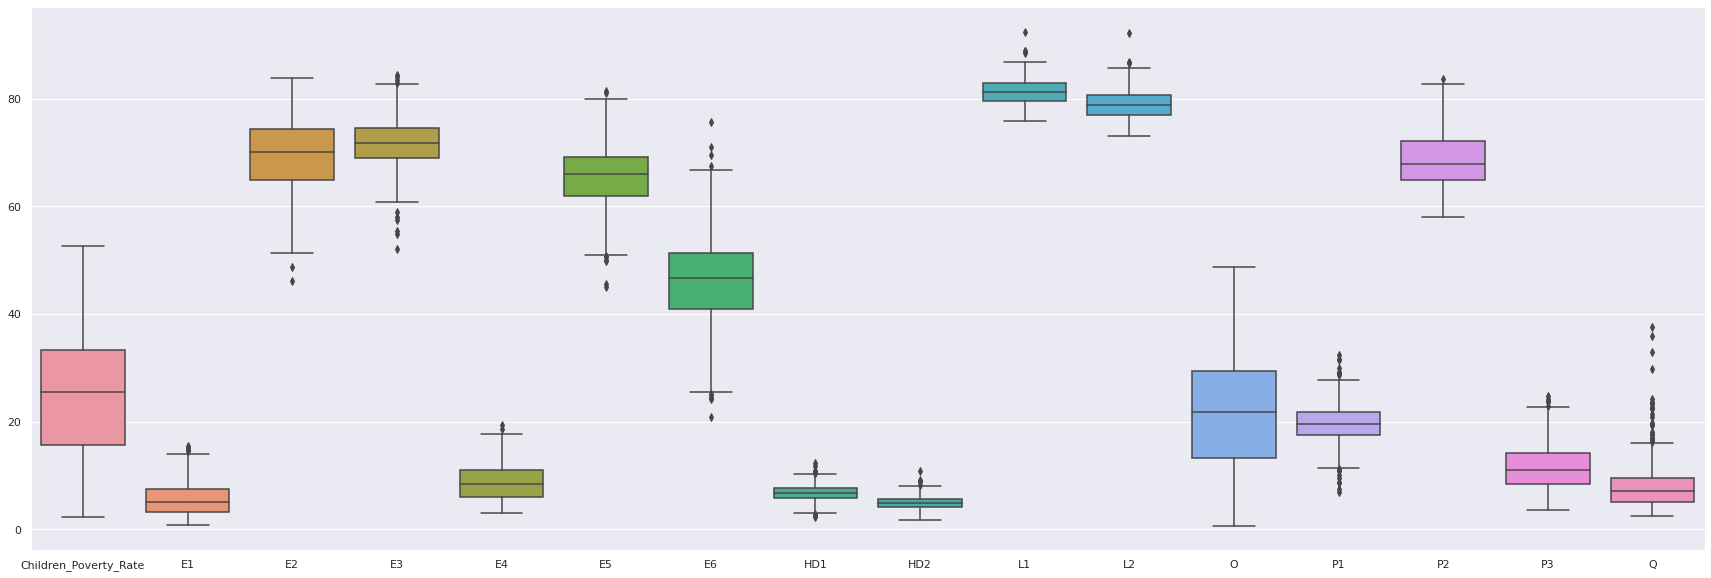

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=usable_df, width = 0.8)

Not so normally distribution

Use normalisation for data pre-process

In [8]:
# normalisation
from sklearn import preprocessing
x = usable_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

Text(0, 0.5, 'Cumulative explained variance')

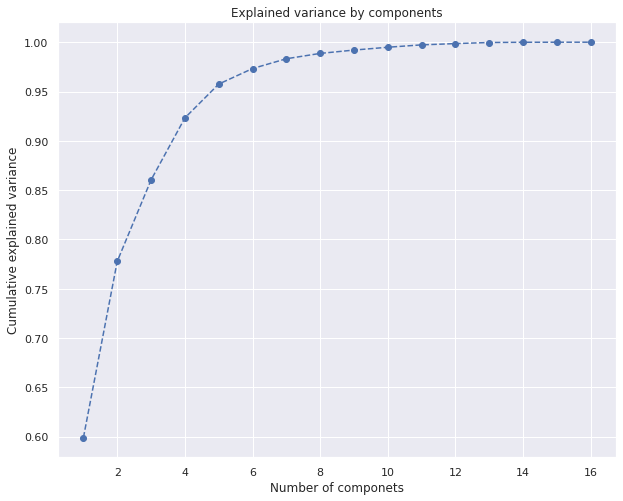

In [9]:
pca = PCA()
pca.fit(X)
plt.figure(figsize = (10,8))
plt.plot(range(1,17), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of componets')
plt.ylabel('Cumulative explained variance')
#plt.savefig('image/Explained variance by components.png',dpi=300)

In [ ]:
pca.explained_variance_ratio_
print("%.2f" % pca.explained_variance_ratio_[0])

0.60


In [ ]:
print("%.2f" % pca.explained_variance_ratio_[1])

0.18


In [ ]:
from sklearn.decomposition import PCA
rand_st_int = 10 
pca = PCA(random_state=rand_st_int)
# fit the components
X_new_components = pca.fit_transform(X)

In [ ]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[5.99159147e-01 1.78682965e-01 8.25241151e-02 6.28609810e-02
 3.42909306e-02 1.57465322e-02 9.93996003e-03 5.41798630e-03
 3.38481938e-03 2.85978688e-03 2.41611973e-03 1.27750259e-03
 1.12192871e-03 2.37527986e-04 5.78995194e-05 2.17979685e-05]


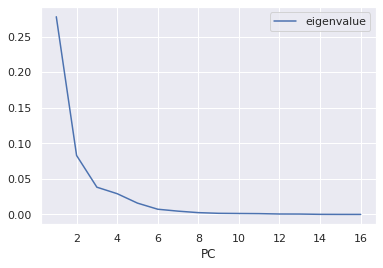

In [ ]:
df_PCA = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df_PCA.plot.line(x = 'PC', y = 'eigenvalue')

select 3 components

In [ ]:
pca = PCA(n_components = 3)
pca.fit(X)
pca.transform(X)
scores_pca = pca.transform(X)

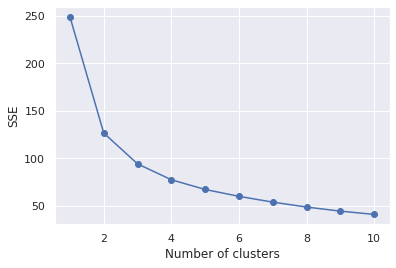

In [ ]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(scores_pca)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

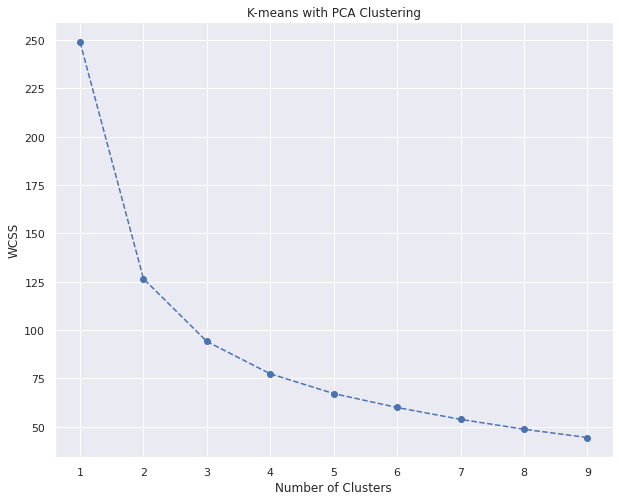

In [ ]:
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
#plt.savefig('image/WSCC.png',dpi=300)
plt.show()

Text(0, 0.5, 'Silhouette Score')

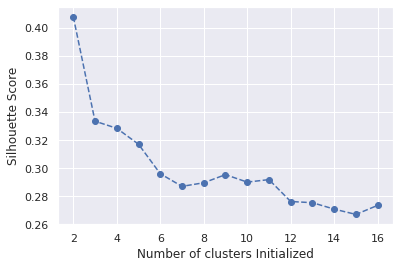

In [ ]:
#silhoutte Score and elbow 
silhoutte_scores=[]#silhoutte Score
#intra_sum_of_square_list = [] #elbow
X2 = scores_pca
clusters = range(2,17)

for k in clusters:
    km = KMeans(n_clusters=k)
    labels = km.fit(X2).labels_
    score = silhouette_score(X2,labels)
    silhoutte_scores.append(score) #silhoutte Score
    #intra_sum_of_square_list.append(km.inertia_) #elbow
    
plt.plot(clusters, silhoutte_scores, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusters Initialized')
plt.ylabel('Silhouette Score')
#plt.savefig('image/silhoutte Score.png',dpi=300)

select 2 clusters

In [ ]:
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 50)
kmeans_pca.fit(scores_pca)
scores_pca.shape

(625, 3)

In [ ]:
pd.DataFrame(scores_pca)

,0,1,2
0,-0.844200,0.473115,0.069279
1,0.553066,0.055107,0.303061
2,0.748068,-0.334256,-0.204671
3,0.724636,-0.249746,-0.066011
4,0.536911,-0.534926,-0.113090
...,...,...,...
620,-0.322536,0.262477,0.017096
621,0.063130,0.195222,0.059452
622,-0.246736,0.431270,0.099974
623,1.129860,-0.120534,-0.176619


In [ ]:
PAC_Score = pd.DataFrame(scores_pca)
PAC_Score.rename(columns={0:'Component 1',1:'Component 2',2:'Component 3'})

,Component 1,Component 2,Component 3
0,-0.844200,0.473115,0.069279
1,0.553066,0.055107,0.303061
2,0.748068,-0.334256,-0.204671
3,0.724636,-0.249746,-0.066011
4,0.536911,-0.534926,-0.113090
...,...,...,...
620,-0.322536,0.262477,0.017096
621,0.063130,0.195222,0.059452
622,-0.246736,0.431270,0.099974
623,1.129860,-0.120534,-0.176619


In [ ]:
usable_df.columns

Index(['Children_Poverty_Rate', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'HD1',
       'HD2', 'L1', 'L2', 'O', 'P1', 'P2', 'P3', 'Q'],
      dtype='object')

In [ ]:
df_segm_pca_kmeans = pd.concat([usable_df, PAC_Score], axis=1,ignore_index=True).rename(
    columns={0:"Children_Poverty_Rate",
             1: 'E1',
             2:"E2",
             3: "E3",
             4: "E4",
             5:"E5",
             6:"E6",
             7:'HD1',
             8:"HD2",
             9:'L1',
             10:'L2',
             11:'O',
             12:'P1',
             13:'P2',
             14:'P3',
             15:'Q',
             16:'Component 1',
             17:'Component 2',
             18:'Component 3'
            })
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans

,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,L2,O,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA
0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,82.252816,12.000000,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,1
1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,81.024825,28.472222,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,0
2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,75.957605,33.538462,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,0
3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,77.462207,32.571429,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,0
4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,79.273343,30.172414,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,82.869666,24.000000,10.843373,74.096386,15.060241,6.4,-0.322536,0.262477,0.017096,1
621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,80.220817,28.787879,14.077670,72.815534,12.621359,7.7,0.063130,0.195222,0.059452,0
622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,81.990857,24.347826,10.994764,76.963351,12.041885,7.7,-0.246736,0.431270,0.099974,1
623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,74.656310,47.692308,21.235521,69.884170,9.266409,7.4,1.129860,-0.120534,-0.176619,0


In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({
    0:'first',
    1:'second',
})

In [ ]:
df_segm_pca_kmeans

,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,...,O,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment
0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,...,12.000000,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,1,second
1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,...,28.472222,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,0,first
2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,...,33.538462,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,0,first
3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,...,32.571429,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,0,first
4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,...,30.172414,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,...,24.000000,10.843373,74.096386,15.060241,6.4,-0.322536,0.262477,0.017096,1,second
621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,...,28.787879,14.077670,72.815534,12.621359,7.7,0.063130,0.195222,0.059452,0,first
622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,...,24.347826,10.994764,76.963351,12.041885,7.7,-0.246736,0.431270,0.099974,1,second
623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,...,47.692308,21.235521,69.884170,9.266409,7.4,1.129860,-0.120534,-0.176619,0,first


In [ ]:
silhouette_kmeans = sklm.silhouette_score(X,KMeans(n_clusters=2).fit(X).labels_)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.34741050121411543


In [ ]:
silhouette_kmeans = sklm.silhouette_score(scores_pca,KMeans(n_clusters=2).fit(scores_pca).labels_)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.40806792633664407


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


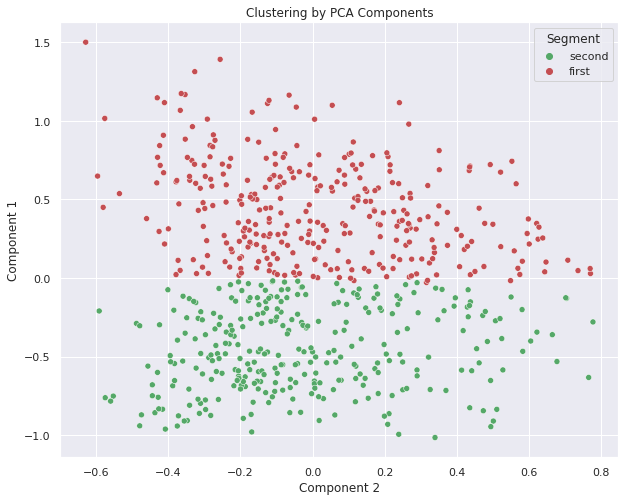

In [ ]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g','r'])
plt.title('Clustering by PCA Components')
#plt.savefig('image/Clustering_by_PCA_Components_12.png', dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


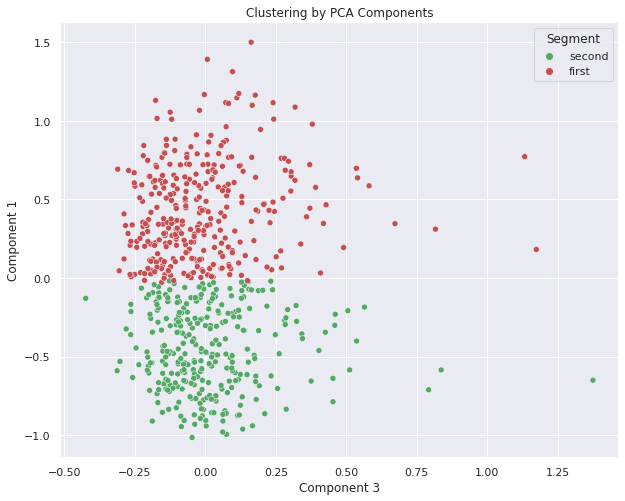

In [ ]:
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g','r'])
plt.title('Clustering by PCA Components')
#plt.savefig('image/Clustering_by_PCA_Components_13.png', dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


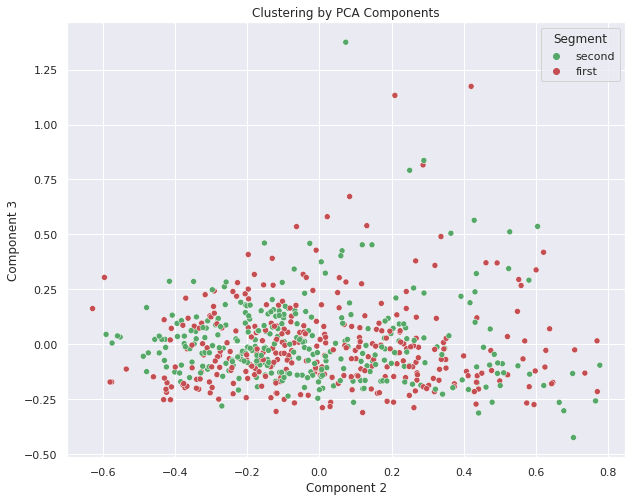

In [ ]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g','r'])
plt.title('Clustering by PCA Components')
#plt.savefig('image/Clustering_by_PCA_Components_23.png', dpi=300)
plt.show()

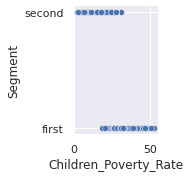

In [ ]:
sns.pairplot(df_segm_pca_kmeans, y_vars='Segment', x_vars='Children_Poverty_Rate')


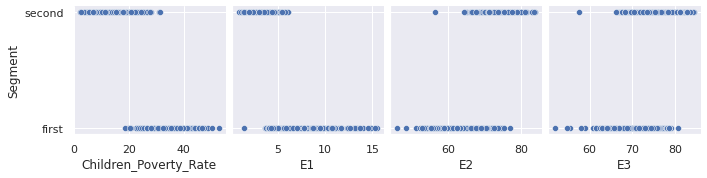

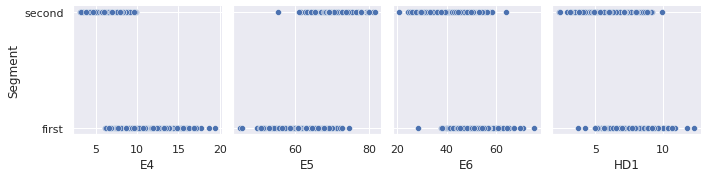

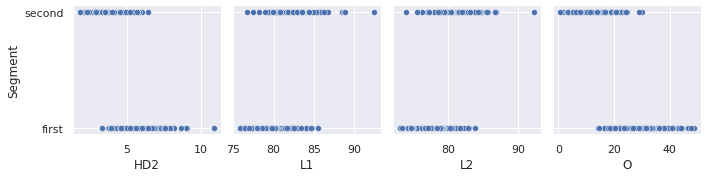

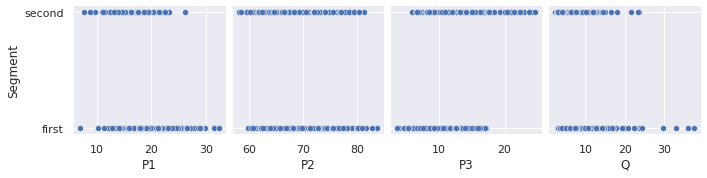

In [ ]:
sns.pairplot(df_segm_pca_kmeans, y_vars='Segment',x_vars=['Children_Poverty_Rate','E1','E2','E3'])

sns.pairplot(df_segm_pca_kmeans, y_vars='Segment',x_vars=['E4','E5','E6','HD1'])

sns.pairplot(df_segm_pca_kmeans, y_vars='Segment',x_vars=['HD2','L1','L2','O'])

sns.pairplot(df_segm_pca_kmeans, y_vars='Segment',x_vars=['P1','P2','P3','Q'])

In [ ]:
ward = gpd.read_file('/content/drive/MyDrive/master dissertation/ESRI/London_Ward_CityMerged.shp')

In [ ]:
ward

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.000,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.000,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.000,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.000,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.000,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...,...,...,...,...,...
620,Whalebone,E05000042,155.399,0.000,E09000002,Barking and Dagenham,117022,"POLYGON ((549410.700 187450.700, 549391.200 18..."
621,Eastbrook,E05000030,345.060,0.000,E09000002,Barking and Dagenham,50856,"POLYGON ((549991.500 184928.500, 549988.900 18..."
622,Chadwell Heath,E05000029,338.422,0.000,E09000002,Barking and Dagenham,117014,"POLYGON ((547715.200 187914.200, 547712.500 18..."
623,Parsloes,E05000037,124.384,0.000,E09000002,Barking and Dagenham,117017,"POLYGON ((547381.600 185753.600, 547377.500 18..."


In [ ]:
result = pd.concat([df_segm_pca_kmeans, df['New Code']], axis=1)

In [ ]:
result.to_csv('/content/drive/MyDrive/master dissertation/pca_out.csv',index=True,header=True)

In [ ]:
result

,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,L1,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment,New Code
0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,83.704458,...,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,1,second,E09000001
1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,82.132476,...,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,0,first,E05000026
2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,78.301335,...,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,0,first,E05000027
3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,78.721642,...,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,0,first,E05000028
4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,80.335587,...,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first,E05000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,83.591136,...,10.843373,74.096386,15.060241,6.4,-0.322536,0.262477,0.017096,1,second,E05000645
621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,82.557700,...,14.077670,72.815534,12.621359,7.7,0.063130,0.195222,0.059452,0,first,E05000646
622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,84.391581,...,10.994764,76.963351,12.041885,7.7,-0.246736,0.431270,0.099974,1,second,E05000647
623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,77.968877,...,21.235521,69.884170,9.266409,7.4,1.129860,-0.120534,-0.176619,0,first,E05000648


In [ ]:
joined = ward.merge(result,left_on = 'GSS_CODE', right_on ='New Code')
joined

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Children_Poverty_Rate,E1,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment,New Code
0,Chessington South,E05000405,755.173,0.000,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",17.3,3.940520,...,21.052632,65.071770,13.875598,3.5,-0.551392,-0.047593,-0.140729,1,second,E05000405
1,Tolworth and Hook Rise,E05000414,259.464,0.000,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",14.6,3.295820,...,19.902913,66.504854,13.592233,6.2,-0.535362,-0.005554,-0.038124,1,second,E05000414
2,Berrylands,E05000401,145.390,0.000,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",10.7,2.346109,...,17.525773,67.010309,15.463918,9.5,-0.544599,-0.041427,0.013221,1,second,E05000401
3,Alexandra,E05000400,268.506,0.000,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",10.2,2.668248,...,20.418848,63.350785,15.706806,5.7,-0.682841,-0.197249,0.055683,1,second,E05000400
4,Beverley,E05000402,187.821,0.000,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16...",16.1,4.128440,...,20.772947,66.666667,13.043478,7.5,-0.302587,-0.082067,0.000018,1,second,E05000402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,Whalebone,E05000042,155.399,0.000,E09000002,Barking and Dagenham,117022,"POLYGON ((549410.700 187450.700, 549391.200 18...",27.5,7.579955,...,23.041475,64.516129,11.981567,5.9,0.166908,-0.222725,-0.063396,0,first,E05000042
621,Eastbrook,E05000030,345.060,0.000,E09000002,Barking and Dagenham,50856,"POLYGON ((549991.500 184928.500, 549988.900 18...",28.4,6.663236,...,20.283019,65.094340,14.622642,5.0,0.223090,-0.238284,-0.178388,0,first,E05000030
622,Chadwell Heath,E05000029,338.422,0.000,E09000002,Barking and Dagenham,117014,"POLYGON ((547715.200 187914.200, 547712.500 18...",35.6,10.147133,...,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first,E05000029
623,Parsloes,E05000037,124.384,0.000,E09000002,Barking and Dagenham,117017,"POLYGON ((547381.600 185753.600, 547377.500 18...",35.0,11.760063,...,25.757576,63.131313,11.111111,5.3,0.767752,-0.429292,-0.154049,0,first,E05000037


(500648.735, 564876.965, 153596.64499999996, 203188.055)

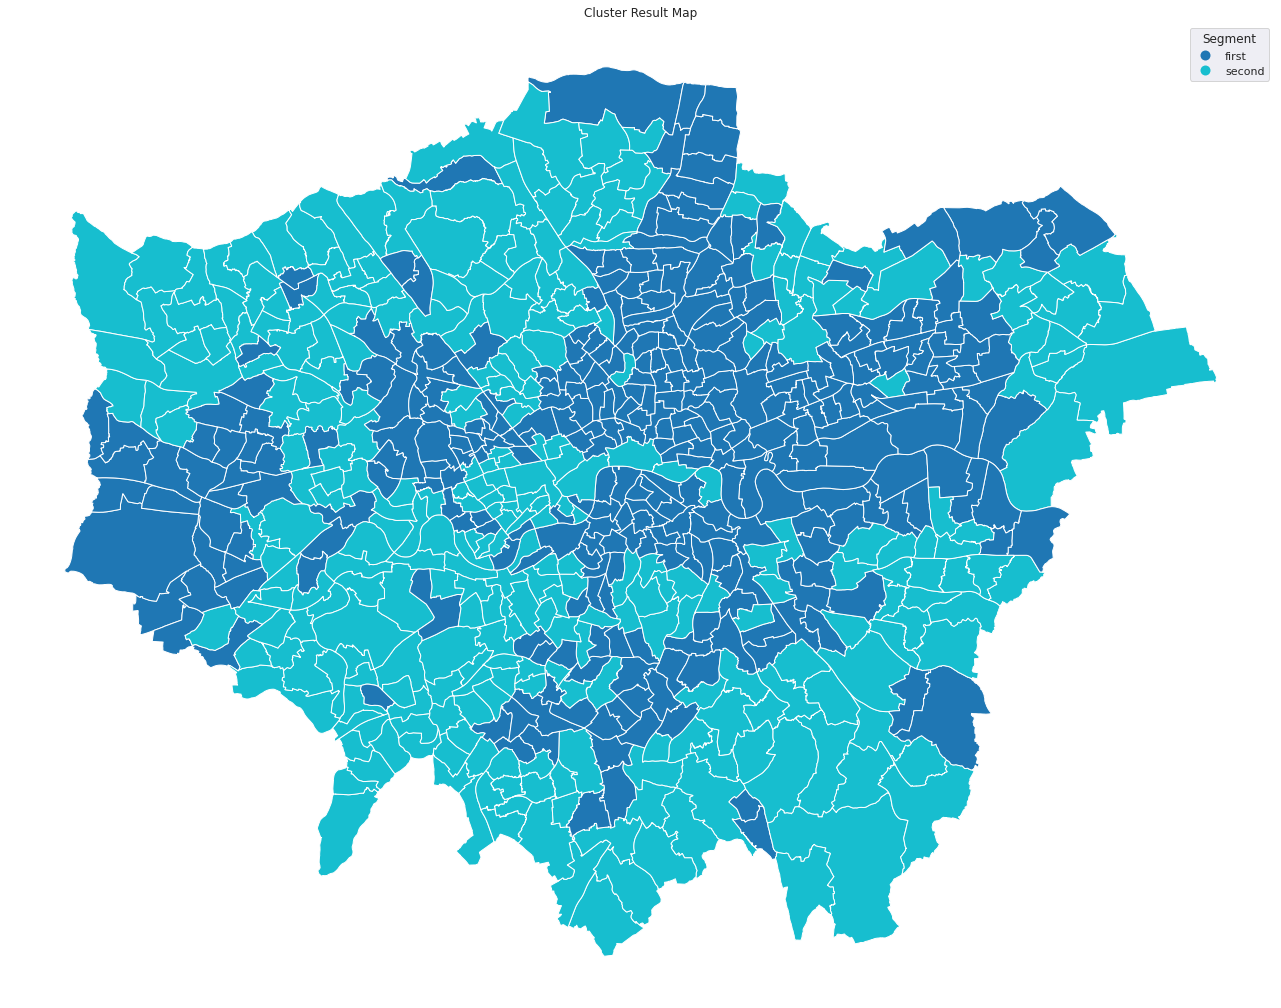

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,18))
color_sequence = ['#1f77b4', '#aec7e8']
joined.plot(ax=ax, column='Segment',legend=True)


ax.get_legend().set_title("Segment") 
plt.title('Cluster Result Map')
ax.axis('off') 


Text(0.5, 1.0, 'Adults not in employment %')

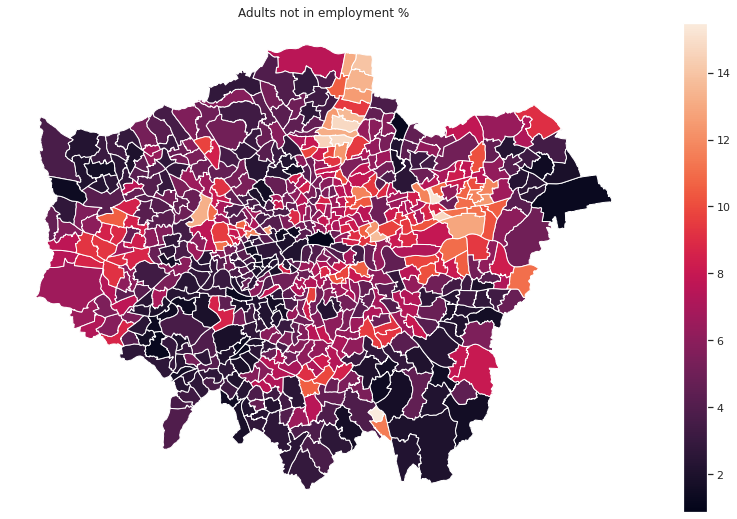

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
joined.plot(ax=ax, column='E1',legend=True)

ax.axis('off') 

plt.title('Adults not in employment %')

Text(0.5, 1.0, 'Children_Poverty_Rate Distribution in London')

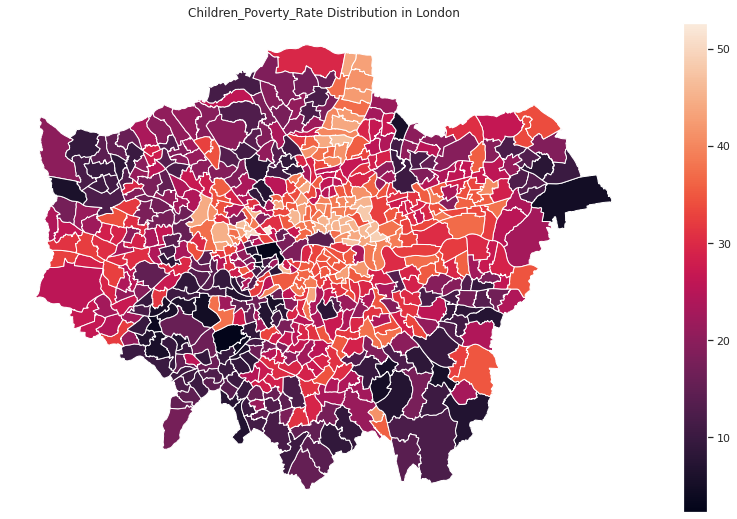

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
joined.plot(ax=ax, column='Children_Poverty_Rate',legend=True)

ax.axis('off') 

plt.title('Children_Poverty_Rate Distribution in London')